# Tarea 3 - Pregunta 1 - Small Circle inside Large Circle

---

# Matías Araya - 201173082-8
# Claudia Hazard - 201404523-9
---

## a)

Para esta primera sección se generan dos conjuntos de datos linealmente inseparables. Esto se hace con una función que genera $n$ datos etiquetados de la forma $(x_1, y_1),...,(x_n, y_n)$, $x_i \in {\rm I\!R}^{2}$, $y_i \in \{0,1\}$

In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [2]:
X_train, Y_train, X_test, Y_test = do_circles()

In [3]:
import matplotlib.pyplot as plt
    
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type,title):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.title(title, fontsize = 18)
    
    plt.show()

## b)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def create_ann_one(X_train,Y_train):
    params = ['sigmoid', 'relu', 'hard_sigmoid', 'tanh']
    models = []
    n_h=1
    
    for p in params:
        model = Sequential()
        model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dense(n_h, kernel_initializer="uniform", activation=p))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
        
        models.append(model)
        
    return models
    

Using TensorFlow backend.


/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


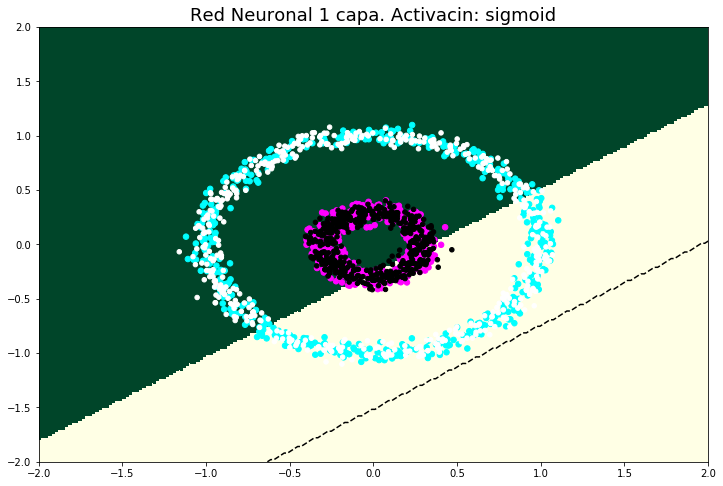

1000/1000 [==============================] - 0s 59us/step

Accuracy de Train: 0.616000
1000/1000 [==============================] - 0s 30us/step

Accuracy de Test: 0.570000
------------------------------------------------------------------------------------------


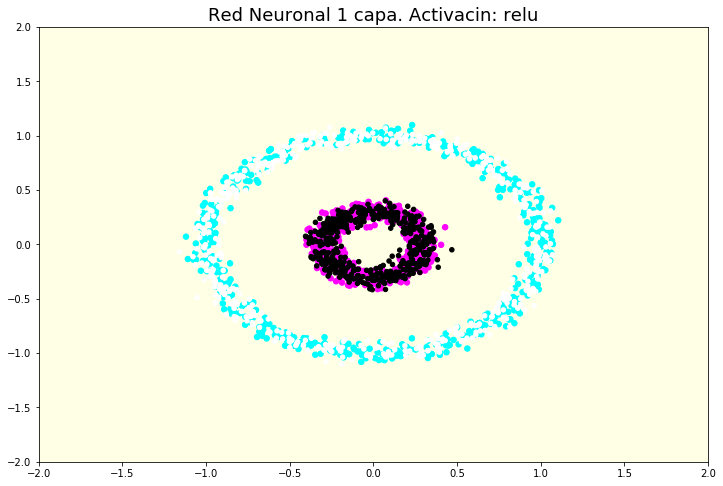

1000/1000 [==============================] - 0s 56us/step

Accuracy de Train: 0.493000
1000/1000 [==============================] - 0s 23us/step

Accuracy de Test: 0.507000
------------------------------------------------------------------------------------------


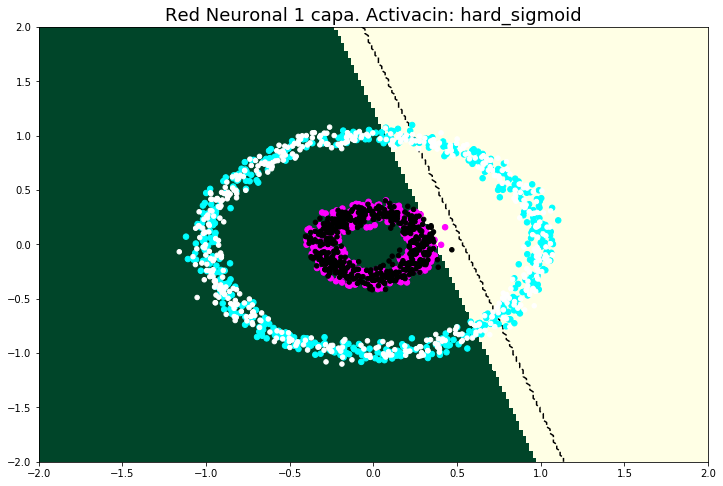

1000/1000 [==============================] - 0s 56us/step

Accuracy de Train: 0.705000
1000/1000 [==============================] - 0s 28us/step

Accuracy de Test: 0.670000
------------------------------------------------------------------------------------------


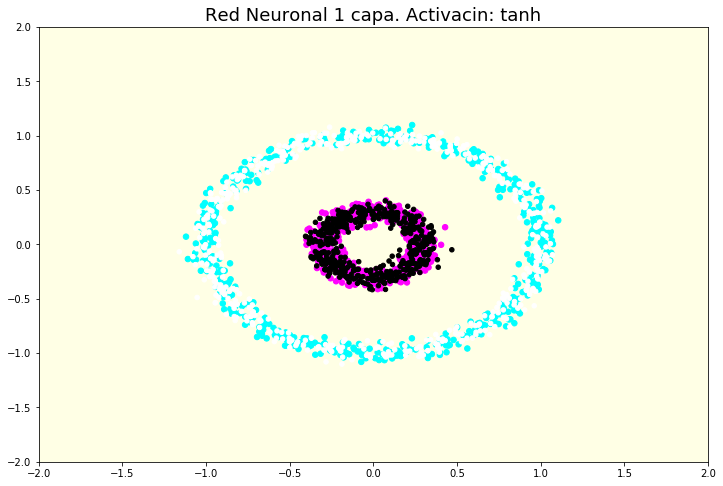

1000/1000 [==============================] - 0s 55us/step

Accuracy de Train: 0.507000
1000/1000 [==============================] - 0s 23us/step

Accuracy de Test: 0.493000
------------------------------------------------------------------------------------------


In [5]:
models = create_ann_one(X_train, Y_train)
params = ['sigmoid', 'relu', 'hard_sigmoid', 'tanh']
i = 0

for model in models:
    plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann', 'Red Neuronal 1 capa. Activacin: %s'%(params[i]))

    scores = model.evaluate(X_train, Y_train)
    train_acc = scores[1]
    print "\nAccuracy de Train: %f"%(train_acc)
    
    scores = model.evaluate(X_test, Y_test)
    test_acc = scores[1]
    print "\nAccuracy de Test: %f"%(test_acc)
    print "------------------------------------------------------------------------------------------"
    i += 1

Queda demostrado, dado los gráficos, que una red nueronal con solo una neurona no es capaz de clasificar correctamente los datos para este caso. Para las funciones de activación *relu* y *tanh* solo identifia una clase. Mientras que para las funciones de activaciones *sigmoid* y *hard_sigmoid* si es posible identificar dos clases, pero dada la configuración geométrica de los datos, donde no son linealmente separable, no lo hace de buena manera. Se tiene un accuracy aproximado para el conjunto de prueba de $0.67$ tanto para *sigmoid* como *hard_sigmoid*.

## c)

In [6]:
def create_ann(X_train, Y_train, X_test, Y_test):
    n_h = np.logspace(1, 5,base=2, num=5)    
    
    models = []
    acc_test = []
    acc_tr = []
    
    for n in n_h:
        n = int(n)
        model = Sequential()
        model.add(Dense(n, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dense(1, kernel_initializer="uniform", activation='sigmoid'))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
        
        scores = model.evaluate(X_train, Y_train)
        acc_tr.append(scores[1])
        
        scores = model.evaluate(X_test, Y_test)
        acc_test.append(scores[1])
        
        models.append(model)
        
        
    return models, acc_tr, acc_test    

1000/1000 [==============================] - 0s 27us/step

Mejor n_h: 4.0
Mejor Accuracy de Train: 1.000000
Mejor Accuracy de Test: 1.000000


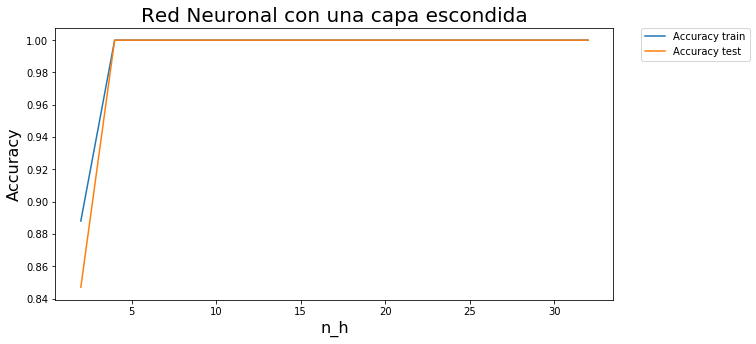

In [7]:
models, acc_tr, acc_test = create_ann(X_train, Y_train, X_test, Y_test)
n_h = np.logspace(1, 5,base=2, num=5)

best_index = acc_test.index(max(acc_test))
best_model = models[best_index]
        
n_h_best = n_h[best_index]
        
print "\nMejor n_h: %s"%(n_h_best)
print "Mejor Accuracy de Train: %f"%(acc_tr[best_index])
print "Mejor Accuracy de Test: %f"%(max(acc_test))


plt.figure(figsize=(10,5))
ax = plt.gca()
ax.plot(n_h,acc_tr,label='Accuracy train')
ax.plot(n_h,acc_test,label='Accuracy test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('n_h', fontsize= 16)
plt.ylabel('Accuracy', fontsize= 16)
plt.title('Red Neuronal con una capa escondida', fontsize= 20)
ax.set_xscale('linear')
plt.show() 

Se grafica el accuracy del modelo versus la cantida de neuronas que se utilizan. Como se puede apreciar, con $4$ neurnoas ya se logra un accuracy de un $100\%$ por lo que no tiene sentido seguir agregando.

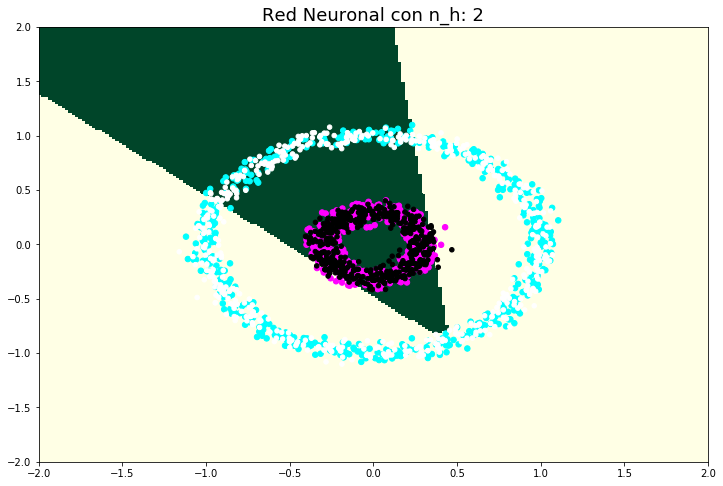

1000/1000 [==============================] - 0s 24us/step

Accuracy de Train: 0.888000
1000/1000 [==============================] - 0s 25us/step

Accuracy de Test: 0.847000
------------------------------------------------------------------------------------------


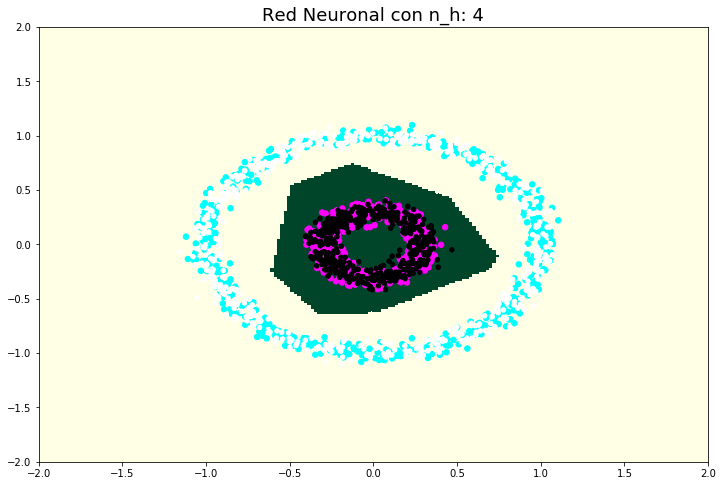

1000/1000 [==============================] - 0s 24us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 24us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


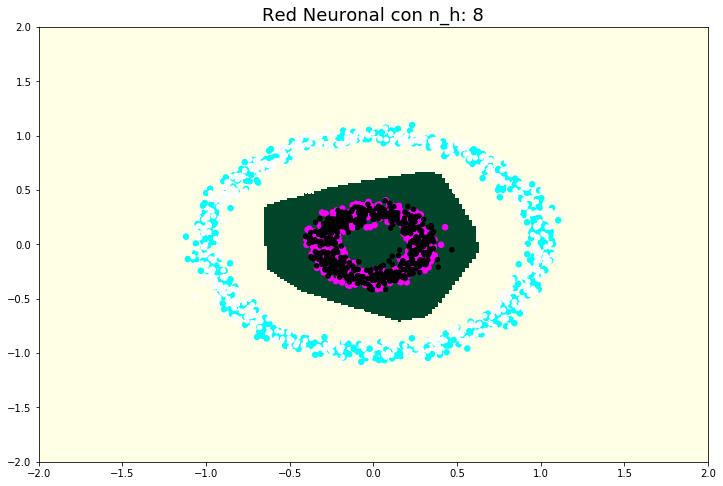

1000/1000 [==============================] - 0s 24us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 24us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


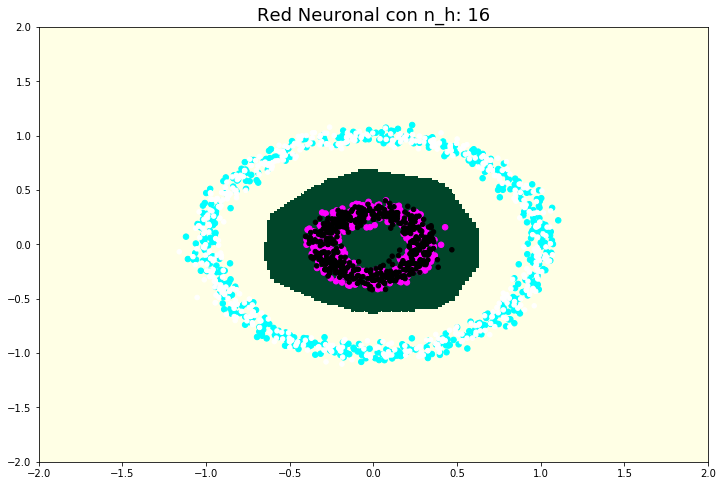

1000/1000 [==============================] - 0s 25us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 24us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


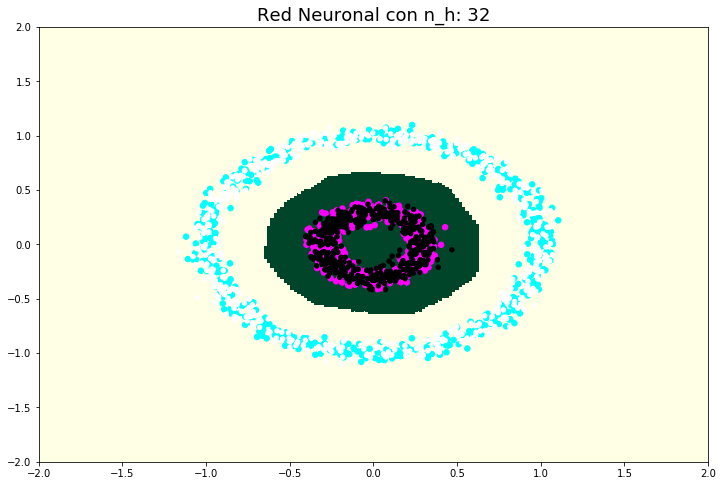

1000/1000 [==============================] - 0s 23us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 24us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


In [8]:
n_h = np.logspace(1, 5,base=2, num=5)
for i,(model) in enumerate(models):
    plot_classifier(model,X_train,Y_train, X_test, Y_test, 'ann', 'Red Neuronal con n_h: %d'%(n_h[i]))
    scores = model.evaluate(X_train, Y_train)
    acc_train = scores[1]
    print "\nAccuracy de Train: %f"%(acc_train)
    
    scores = model.evaluate(X_test, Y_test)
    acc_test = scores[1]
    print "\nAccuracy de Test: %f"%(acc_test)
    print "------------------------------------------------------------------------------------------"

Se puede ver como en un principio con solo $2$ neuronas no es posible resolver el problema adecuadamente, donde hay un trozo de los puntos que no pueden ser bien clasificados. Ya con 4 neuronas, el problema si es posible resolver perfectamente. Sin embargo, este problema esta perfectamente separado, no existe ruido, por lo que es trivial. Como se ve con $4$ neuronas, probablemente sea muy sensible a outliers, mientras que con más neuronas se ve como se encierra mejor a las clases.

## d)

Train Accuracy = 0.705000
Test Accuracy = 0.670000
Profundidad del arbol = 1


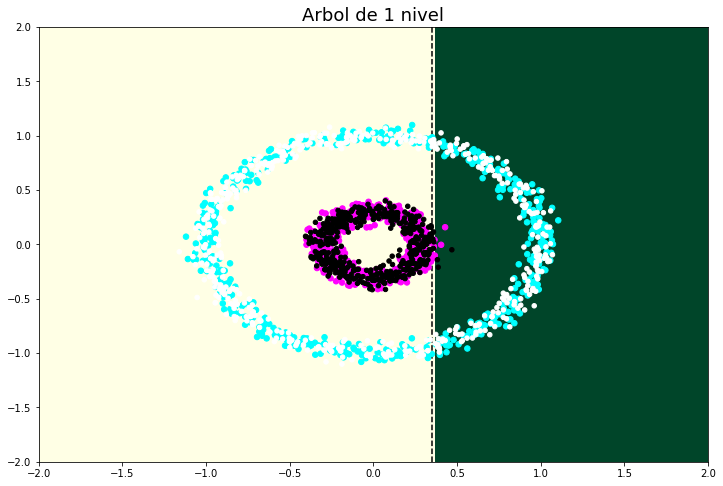

In [9]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc_tr = clf.score(X_train,Y_train)
print "Train Accuracy = %f"%acc_tr
print "Test Accuracy = %f"%acc_test
print "Profundidad del arbol = %d"%clf.tree_.max_depth

plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree', 'Arbol de 1 nivel')

Queda demostrado que con un árbol de clasificación de un solo nivel no se puede resolver satisfactoriamente el problema anterior. Cualitativamente se puede ver en el gráfico donde solo se hace un corte lineal, y como se sabe este problema no es linealmente separable por lo que es imposible resolver el problema. Así se obtiene cuantitativamente un train accuracy de un $0.70$, mientras que el test accuracy es de $0.67$.

## e)

In [12]:
def make_Tree(x,y,xt,yt):
    N_ts = np.linspace(2, 20, num=19)
    print N_ts
    acc_tr = []
    acc_test = []
    models = []
    for n_t in N_ts:
        clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc_tr.append(clf.score(x,y))
        acc_test.append(clf.score(xt, yt))
        models.append(clf)
    
    model_best = models[acc_test.index(max(acc_test))]
    
    print "Profundidad del árbol = %d"%model_best.tree_.max_depth
    print "Mejor Accuracy de Test: %f"%(max(acc_test))
    
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.plot(N_ts,acc_tr,label='Accuracy train')
    ax.plot(N_ts,acc_test,label='Accuracy test')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('N_t', fontsize= 16)
    plt.ylabel('Accuracy', fontsize= 16)
    plt.title(u'Árbol de clasificacion con múltiples niveles', fontsize= 20)
    ax.set_xscale('linear')
    plt.show()

    return model_best

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.]
Profundidad del árbol = 4
Mejor Accuracy de Test: 0.994000


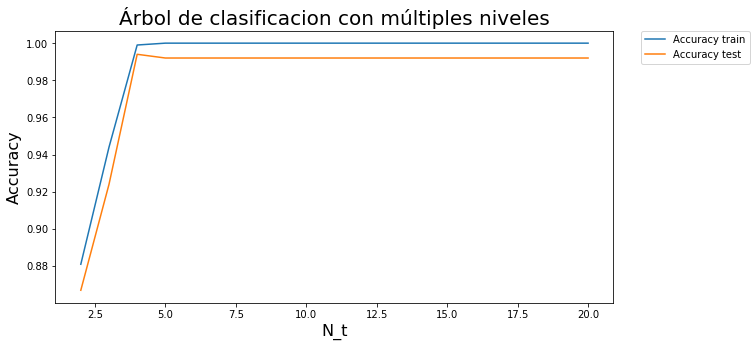

In [13]:
model_tree = make_Tree(X_train,Y_train,X_test,Y_test)

Gracias al gráfico anterior queda demostrado que el problema si se puede resolver con árboles de clasificación con múltiples niveles. El árbol que consigue un mejor accuracy de test es con cuatro niveles, el cual es de $0.994$, lo que es casi perfecto. Los siguientes niveles se mantienen casi constantes.

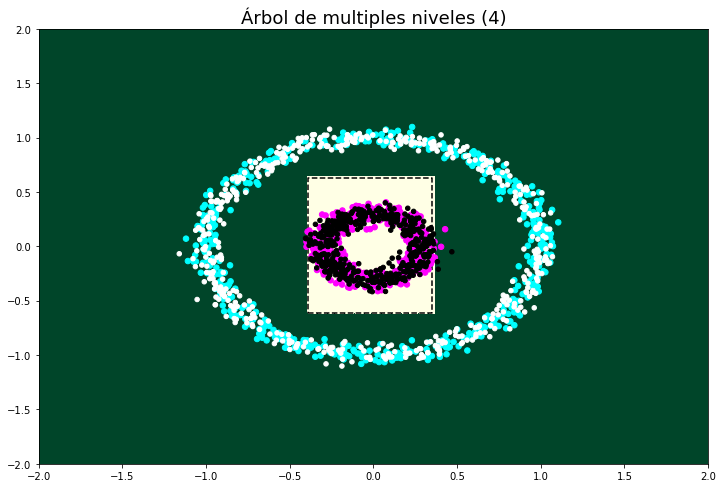

In [15]:
plot_classifier(model_tree,X_train,Y_train,X_test,Y_test,'tree', u'Árbol de multiples niveles (4)')

Se puede ver como realiza la clasificación graficamente el árbol con 4 níveles, donde deja afuera solo unos pocos puntos de la clase interior. Esto puede ser más notorio en un caso donde se tenga una mayor cantidad de ruido.

Accuracy Train = 1.000000
Accuracy Test = 0.992000


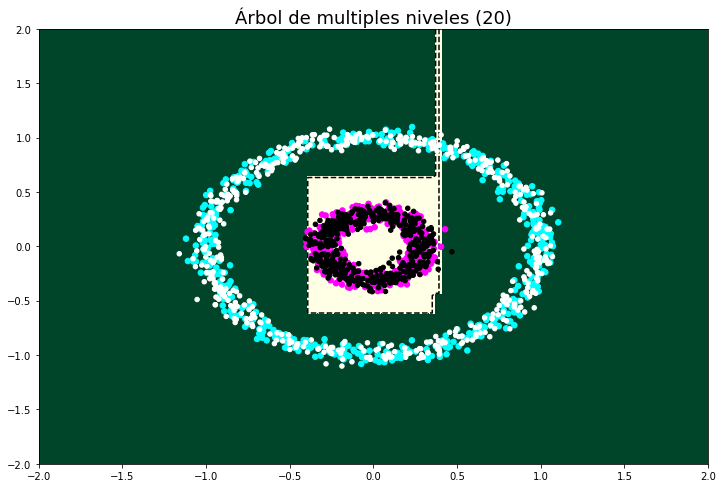

In [17]:
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=20)
clf.fit(X_train,Y_train)
print "Accuracy Train = %f"%clf.score(X_train,Y_train)
print "Accuracy Test = %f"%clf.score(X_test, Y_test)

plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree', u'Árbol de multiples niveles (20)')

Dado que el ruido es muy poco, el error de test para el árbol de 20 níveles sigue siendo excelente $0.992$. Sin embargo, en un caso mas real el overfitting, probablemente sería altísimo con lo que se vería una diferencia considerable con el árbol de 4 niveles.

## f)

In [19]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

Se utiliza la técnica PCA con la ayuda de un *Kernel Gaussiano* para extraer sus vectores con dimensión infinita de mayor varianza.

## g)

In [24]:
from sklearn.linear_model import LogisticRegression as LR

lineal_model = LR()
lineal_model.fit(Xkpca_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print "Accuracy Train = %f"%lineal_model.score(Xkpca_train,Y_train)
print "Accuracy Test = %f"%lineal_model.score(Xkpca_test, Y_test)

Accuracy Train = 1.000000
Accuracy Test = 1.000000


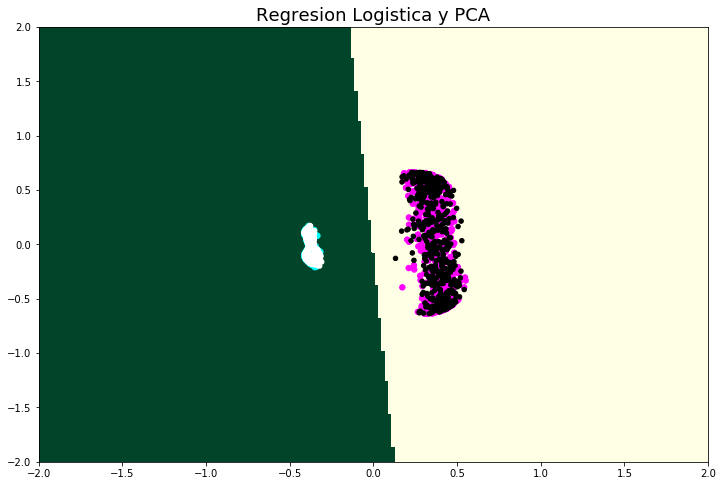

In [30]:
plot_classifier(lineal_model,Xkpca_train,Y_train,Xkpca_test,Y_test,'tree', 'Regresion Logistica y PCA')

Se utiliza para comprobar la utilidad de PCA, **Regresión Logística**, la cual separa linealmente las clases. Como se puede comprobar en el gráfico anterior las clases quedan completamente separadas con la configuración de PCA con lo que es fácil para el modelo obtener la respuesta adecuada. Así, este modelo en particular, tanto para el conjunto de entrenamiento como el de prueba, obtiene un accuracy perfecto de $1$.